In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#step 1: Import all required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [6]:
#step 2: Loading the data
data=pd.read_csv('/kaggle/input/airways-customer-bookingdata/customer_booking (1).csv', encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


This is flight booking data of British Airways over the last few years.
The attribute descriptions as follows:

**num_passengers** = number of passengers travelling

**sales_channel** = sales channel booking was made on

**trip_type** = trip Type (Round Trip, One Way, Circle Trip)

**purchase_lead** = number of days between travel date and booking date

**length_of_stay** = number of days spent at destination

**flight_hour** = hour of flight departure

**flight_day** = day of week of flight departure

**route** = origin -> destination flight route

**booking_origin** = country from where booking was made

**wants_extra_baggage** = if the customer wanted extra baggage in the booking

**wants_preferred_seat** = if the customer wanted a preferred seat in the booking

**wants_in_flight_meals** = if the customer wanted in-flight meals in the booking

**flight_duration** = total duration of flight (in hours)

**booking_complete** = flag indicating if the customer completed the booking

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
#Finding the missing values
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

There are no missing values in any of the column in the given data****

In [9]:
#Basic Statistics on the given data
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


#observations 

->We can  say that there are 50000 records in the dataset.i.e 50000 customer data is available.

->On an average the duration of the flight journey is around 7.2 hours.

->On an average the passengers are booking their tickets 84 days before,their travel date.

->We can say  that the average number of days that the passenger spent at destination is around 23 days.

In [10]:
rel=data.groupby(['sales_channel']).agg({'booking_complete':'count'})#,'booking_complete')
rel

,booking_complete
sales_channel,
Internet,44382
Mobile,5618


Out of 50000 passengers, 44382 passengers booked their tickets over an internet.

Remaining 5618 passengers booked their tickets on mobile .

<AxesSubplot:xlabel='sales_channel'>

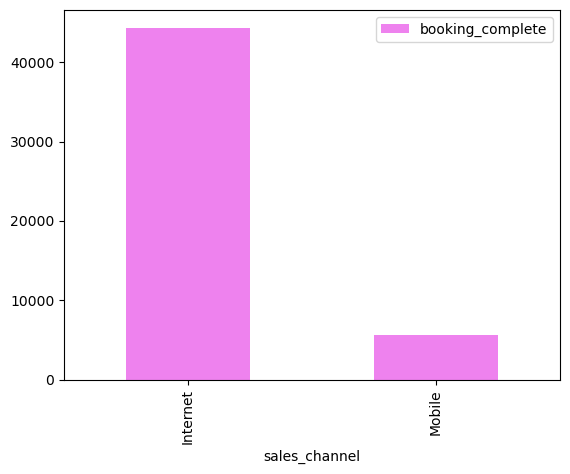

In [11]:
rel.plot(kind='bar',color='violet')

<AxesSubplot:xlabel='booking_origin'>

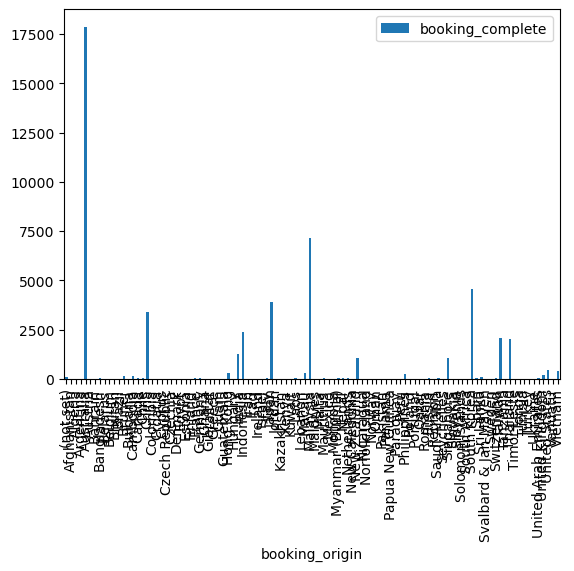

In [12]:
rel2=data.groupby(['booking_origin']).agg({'booking_complete':'count'})
rel2.plot(kind='bar')

<AxesSubplot:xlabel='booking_origin'>

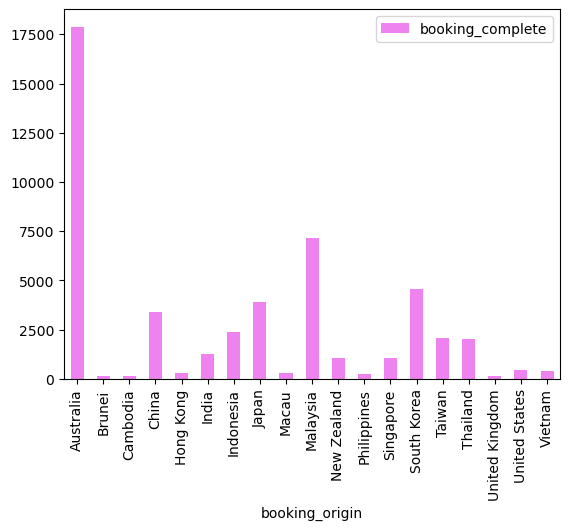

In [13]:
df_origin = data.groupby(['booking_origin']).agg({'booking_complete':'count'})
df_origin_filter = df_origin[df_origin['booking_complete']>100]
df_origin_filter.plot(kind='bar',color='violet')

Most of the bookings happened from Australia  and second highest bookings are from Malaysia.


In [14]:
data['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [16]:
label_encoder =LabelEncoder()
data['sales_channel']=label_encoder.fit_transform(data['sales_channel'])
data['trip_type']=label_encoder.fit_transform(data['trip_type'])
data['flight_day']=label_encoder.fit_transform(data['flight_day'])
data['booking_origin']=label_encoder.fit_transform(data['booking_origin'])
data['route']=label_encoder.fit_transform(data['route'])

In [17]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


In [19]:
clf=RandomForestClassifier(random_state=0)
x=data.drop(columns='booking_complete')
y=data['booking_complete']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [20]:
print("Accuracy of the model is :",accuracy_score(y_test,y_pred))
print("Confusion matrix is:",confusion_matrix(y_test,y_pred))
print("F1 score of model is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy of the model is : 0.8485333333333334
Confusion matrix is: [[12508   214]
 [ 2058   220]]
F1 score of model is: 0.8021568518994162


<AxesSubplot:>

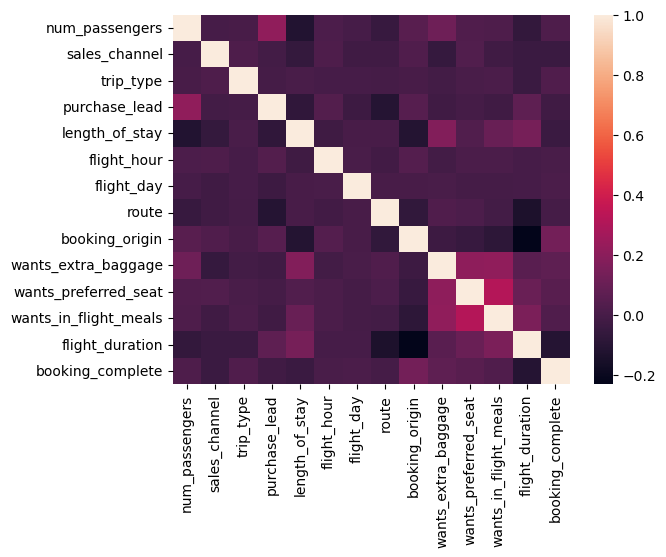

In [23]:
mat=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(data.corr())

In [24]:
feature_importances = clf.feature_importances_ 
sorted(feature_importances)

[0.0017530955766755678,
 0.013028924661424936,
 0.015371580288756658,
 0.0166351151104031,
 0.020865231464232088,
 0.04926720163731537,
 0.07086690115114144,
 0.0903099930097177,
 0.11082792319210207,
 0.1265427973547159,
 0.14175903738495854,
 0.1509240899607021,
 0.19184810920785458]

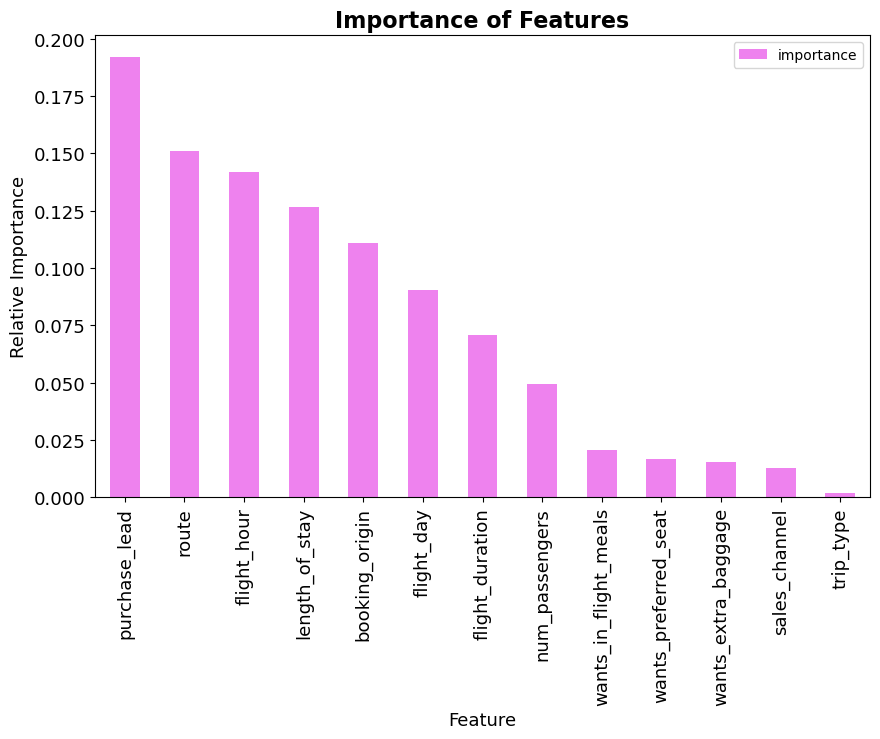

In [25]:
var=data.columns
feat_importances = sorted(zip(feature_importances, var), reverse=True)
df_rf = pd.DataFrame(data = feat_importances)  
df_rf.columns = ['importance', 'feature'] 
df_rf.set_index('feature', inplace=True)
fig, ax = plt.subplots(figsize=(10,6))
df_rf.plot(ax=ax, kind='bar', color ='violet') 
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Importance of Features', fontweight="bold", size =16)  
ax.set_ylabel('Relative Importance', fontsize = 13)
ax.set_xlabel('Feature', fontsize = 13);

#From the above graph ,we can say that most of the predictive power is rests with the attribute called "Purchase _load"

In [26]:
data.corr()['booking_complete']

num_passengers           0.024116
sales_channel           -0.041060
trip_type                0.027021
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_hour              0.007127
flight_day               0.010929
route                   -0.008488
booking_origin           0.130804
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
flight_duration         -0.106266
booking_complete         1.000000
Name: booking_complete, dtype: float64